In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
BATCH_SIZE = 32
IMAGE_LENGTH = 256
IMAGE_BREADTH = 256
CHANNELS = 3
EPOCHS = 25
DirName = '../DataSet/Tomato_split'

In [3]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=10,
        horizontal_flip=True
)
train = train_datagen.flow_from_directory(
        f'{DirName}/train',
        target_size=(IMAGE_LENGTH,IMAGE_BREADTH),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 6138 images belonging to 5 classes.


In [4]:
validation_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=10,
        horizontal_flip=True)
val = validation_datagen.flow_from_directory(
        f'{DirName}/val',
        target_size=(IMAGE_LENGTH,IMAGE_BREADTH),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 766 images belonging to 5 classes.


In [5]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test = test_datagen.flow_from_directory(
        f'{DirName}/test',
        target_size=(IMAGE_LENGTH,IMAGE_BREADTH),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 771 images belonging to 5 classes.


In [6]:
class_names = list(train.class_indices.keys())
class_names

['Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Target_Spot',
 'Tomato_healthy']

In [7]:
input_dimensions = (IMAGE_LENGTH, IMAGE_BREADTH, CHANNELS)


model = keras.models.Sequential([
    
    keras.layers.Conv2D(32, (3, 3), input_shape = input_dimensions, activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(class_names), activation='softmax')

])

model.build(input_shape = input_dimensions)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [9]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [10]:
history = model.fit(
    train,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val,
    # steps_per_epoch=47,
    # validation_steps=6
)

Epoch 1/25
192/192 [==============================] - 177s 885ms/step - loss: 1.2524 - accuracy: 0.4573 - val_loss: 0.8545 - val_accuracy: 0.6919
Epoch 2/25
192/192 [==============================] - 175s 914ms/step - loss: 0.7195 - accuracy: 0.7239 - val_loss: 0.5871 - val_accuracy: 0.8029
Epoch 3/25
192/192 [==============================] - 198s 1s/step - loss: 0.5762 - accuracy: 0.7830 - val_loss: 0.4512 - val_accuracy: 0.8525
Epoch 4/25
192/192 [==============================] - 207s 1s/step - loss: 0.4383 - accuracy: 0.8420 - val_loss: 0.3974 - val_accuracy: 0.8460
Epoch 5/25
192/192 [==============================] - 203s 1s/step - loss: 0.3806 - accuracy: 0.8635 - val_loss: 0.3645 - val_accuracy: 0.8642
Epoch 6/25
192/192 [==============================] - 179s 934ms/step - loss: 0.3280 - accuracy: 0.8819 - val_loss: 0.3291 - val_accuracy: 0.8838
Epoch 7/25
192/192 [==============================] - 192s 1000ms/step - loss: 0.2740 - accuracy: 0.9024 - val_loss: 0.2970 - val_acc

In [11]:
model.evaluate(test)

25/25 [==============================] - 24s 980ms/step - loss: 0.2763 - accuracy: 0.9533


[0.2763344645500183, 0.9533073902130127]

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

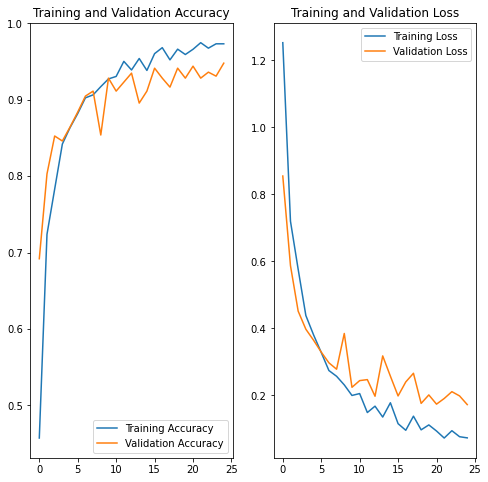

In [13]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
def predict(model, img):
    # img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

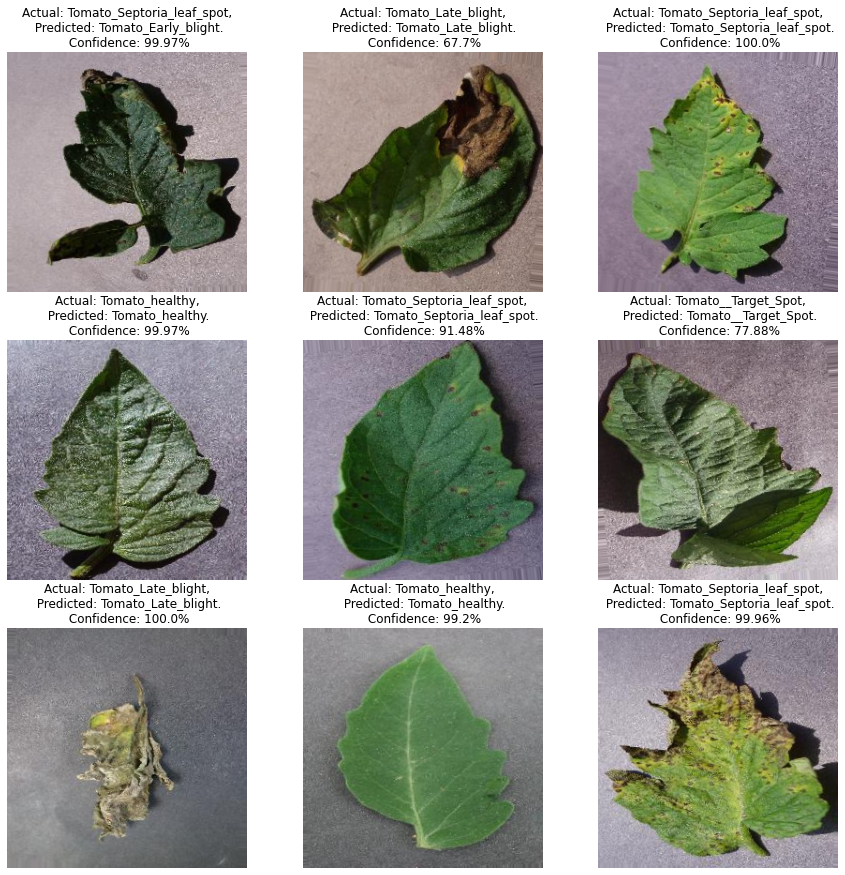

In [15]:
plt.figure(figsize=(15, 15))
for images, labels in test:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [16]:
model_version = 2
model_name = f'tomato_{model_version}'
model.save(f"../saved_models/{model_name}")

INFO:tensorflow:Assets written to: ../saved_models/tomato_2\assets


In [17]:
import tensorflowjs as tfjs
from tensorflow import keras
model_name = f'tomato_{model_version}'
saved_model = keras.models.load_model(f"../saved_models/{model_name}")
tfjs.converters.save_keras_model(saved_model, "../saved_models/js/tomato")
